# 10. Supported Vector Machines


In [1]:
# importar os datasets
from sklearn import datasets

# load do dataset
cancer = datasets.load_breast_cancer()

In [2]:
# ver os dois primeiros registos
print(cancer.data[0:2])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]]


In [3]:
# importar a função train_test_split 
from sklearn.model_selection import train_test_split

# Split do dataset
X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    test_size=0.3,
                                                    random_state=1980) 

In [4]:
# importar o modelo svm
from sklearn import svm

# criar o classificador svm 
# com um kernel linear
# para fazer classificação SVC
# para regressão seria SVR
clf = svm.SVC(kernel='linear')

In [5]:
# treinar o modelo (fazer o fit)
clf.fit(X_train, y_train)

# prever com o dataset de teste
y_pred = clf.predict(X_test)

In [6]:
# importar as métricas para avaliar o modelo
from sklearn import metrics

# Model Accuracy: Quantas vezes acerta o classificador?
# Diagonal
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision: Dos que previu como positivos quantos eram realmente positivos? 
# Coluna direita
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall: Dos que são positivos quantos previu?
# Linha inferior
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9532163742690059
Precision: 0.9396551724137931
Recall: 0.990909090909091


In [10]:
from sklearn.metrics import confusion_matrix
import pandas as pd

cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm,columns = ['pred: 0','pred: 1'],
                   index = ['real: 0','real: 1']))

         pred: 0  pred: 1
real: 0       54        7
real: 1        1      109


In [96]:
import numpy as np
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(random_state=0)

train_sizes = np.linspace(0.1, 1, num=10)
disp = LearningCurveDisplay.from_estimator(
    clf,
    cancer.data, 
    cancer.target,
    train_sizes=train_sizes,
    cv=cv,
    score_type="both",
    scoring="accuracy",  
    score_name="Accuracy",
    std_display_style="errorbar",
    errorbar_kw={"alpha": 0.7},  
    n_jobs=2,
)

_ = disp.ax_.set(title="Learning curve for support vector machine")

ImportError: cannot import name 'LearningCurveDisplay' from 'sklearn.model_selection' (C:\Users\sonia.quaresma\Anaconda3\lib\site-packages\sklearn\model_selection\__init__.py)

## 10.2 SVM kernels

In [57]:
import pandas as pd  
import numpy as np  
from sklearn import datasets
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt

In [58]:
# Load  X e y data a partir do dataset
iris = datasets.load_iris()

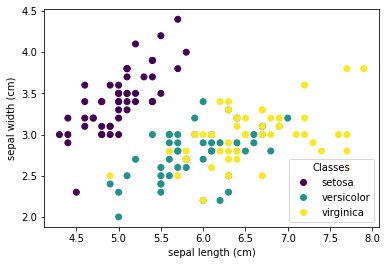

In [62]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [63]:
X = iris.data
y = iris.target

X.shape

(150, 4)

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [79]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']

def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [81]:
for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)# Train a SVC model using different kernels
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)# Make prediction
    y_pred = svclassifier.predict(X_test)# Evaluate our model
    print("Evaluation:", kernels[i], "kernel")
    print(classification_report(y_test,y_pred))

Evaluation: Polynomial kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.91      1.00      0.95        10
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.97      0.94      0.95        30
weighted avg       0.97      0.97      0.97        30

Evaluation: RBF kernel
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

Evaluation: Sigmoid kernel
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00      

C:\Users\sonia.quaresma\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sonia.quaresma\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sonia.quaresma\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [83]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ......................C=10, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .......................C=10, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [84]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=0.1, kernel='poly')


In [86]:
y_pred = grid.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(pd.DataFrame(cm,columns = ['pred: 0','pred: 1','pred: 2'],
                   index = ['real: 0','real: 1','real: 2']))

print(classification_report(y_test,y_pred))

         pred: 0  pred: 1  pred: 2
real: 0        8        0        0
real: 1        0       13        2
real: 2        0        1        6
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.93      0.87      0.90        15
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.91      0.90        30
weighted avg       0.91      0.90      0.90        30



### 10.3 Mostrar a Decision Boundary

In [90]:
# Como vamos mostrar em 2D só podemos ver 2 caracteristicas de cada vez
X_01 = iris.data[:, :2]
clf = svm.SVC(C=0.1, gamma=0.1, kernel='poly')

clf.fit(X_01, y)

SVC(C=0.1, gamma=0.1, kernel='poly')

In [91]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(clf, X_01, response_method="predict",
                                              xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
                                              alpha=0.5)

disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor="k")
plt.show()

ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (C:\Users\sonia.quaresma\Anaconda3\lib\site-packages\sklearn\inspection\__init__.py)

## 11.1 Boosting - XGBoost

In [97]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [98]:
diamonds.shape

(53940, 10)

In [101]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [102]:
diamonds.describe(exclude = np)

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [99]:
from sklearn.model_selection import train_test_split

X, y = diamonds.drop('price', axis=1), diamonds[['price']]

In [103]:
# Extrair features de texto
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Converter para categorias Pandas
for col in cats:
    X[col] = X[col].astype('category')

In [104]:
X.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
x           float64
y           float64
z           float64
dtype: object

In [105]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1923)

In [106]:
import xgboost as xgb

# Cria mareizes de regressão
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [110]:
# Define hyperparametros
params = {"objective": "reg:squarederror", "tree_method": "exact"}

n = 100
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [111]:
from sklearn.metrics import mean_squared_error

preds = model.predict(dtest_reg)

In [112]:
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the base model: {rmse:.3f}")

RMSE of the base model: 550.075


### 11.1.1 Com validation sets

In [115]:
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
)

[0]	train-rmse:3958.59229	validation-rmse:4010.74805
[1]	train-rmse:2831.10840	validation-rmse:2868.60840
[2]	train-rmse:2048.22119	validation-rmse:2078.60938
[3]	train-rmse:1511.83716	validation-rmse:1538.34412
[4]	train-rmse:1149.73950	validation-rmse:1175.61365
[5]	train-rmse:914.45471	validation-rmse:941.41913
[6]	train-rmse:759.34051	validation-rmse:788.39783
[7]	train-rmse:664.33807	validation-rmse:697.13355
[8]	train-rmse:607.04864	validation-rmse:642.74091
[9]	train-rmse:571.82825	validation-rmse:611.31177
[10]	train-rmse:549.35187	validation-rmse:592.29755
[11]	train-rmse:535.53571	validation-rmse:580.09338
[12]	train-rmse:526.40540	validation-rmse:572.51398
[13]	train-rmse:520.20013	validation-rmse:568.16266
[14]	train-rmse:511.72125	validation-rmse:563.64044
[15]	train-rmse:506.20633	validation-rmse:563.51013
[16]	train-rmse:499.57623	validation-rmse:562.03064
[17]	train-rmse:493.96783	validation-rmse:559.83575
[18]	train-rmse:490.68329	validation-rmse:558.23181
[19]	train-r

In [116]:
# com early stop
n = 10000


model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=50,
   # Activate early stopping
   early_stopping_rounds=50
)

[0]	train-rmse:3958.59229	validation-rmse:4010.74805
[50]	train-rmse:427.42819	validation-rmse:551.01392
[100]	train-rmse:372.33862	validation-rmse:549.59631
[150]	train-rmse:328.08151	validation-rmse:550.38519
[184]	train-rmse:307.47189	validation-rmse:552.25281


### 11.1.2 Com Cross-Validation

In [119]:
params = {"objective": "reg:squarederror", "tree_method": "exact"}
n = 1000

results = xgb.cv(
   params, dtrain_reg,
   num_boost_round=n,
   nfold=5,
   early_stopping_rounds=20
)

In [120]:
results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,3959.200635,15.621606,3960.795947,65.048595
1,2830.789697,10.762555,2836.622656,52.972479
2,2047.693311,7.033665,2057.212183,45.657869
3,1511.048340,6.050756,1525.268530,37.224222
4,1148.521069,4.867660,1166.714795,29.443160


## 11.2 Stacking

### 11.2.1 Avaliar e Comparar Modelos incluindo o Stacking

In [12]:
# importar a função para fazer um dataset
from sklearn.datasets import make_classification

# definir o dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1973)

# caracteristicas do dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [23]:
# todos os imports
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [24]:
# função para dar o dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
    return X, y
 

In [25]:
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    return models

In [26]:
# avaliar um modelo usando cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # estamos a usar a accuracy para o scoring
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [27]:
X, y = get_dataset()
models = get_models()

# avalia os modelos e regista os resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.822 (0.044)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)


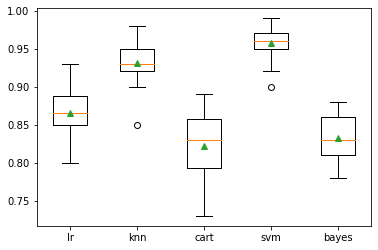

In [28]:
# faz boxplot do desempenho dos modelos para comparação
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [29]:
# define o stacking ensemble dos modelos
def get_stacking():
    # define os modelos de base
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define o modelo meta learner
    level1 = LogisticRegression()
    # define o stacking ensemble usando o Stacking Classifier e cross-validation
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [30]:
# redefinimos a lista de modelos a avaliar acrescentando o stacking
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.831 (0.044)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.964 (0.019)


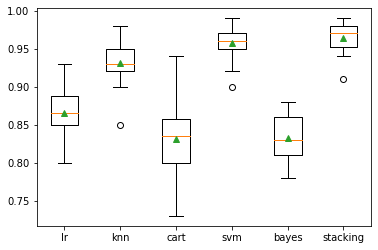

In [31]:
X, y = get_dataset()
models = get_models()

# avalia os modelos e regista os resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# faz boxplot do desempenho dos modelos para comparação
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### 11.2.2 Prever usando o Stacking de Modelos

In [32]:
# imports
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [33]:
# definir o dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

In [34]:
# definir os modelos de base
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))

In [35]:
# definir o modelo meta learner
level1 = LogisticRegression()

# definir o stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [36]:
# treinar o modelo com todos os dados (fazer o fit)
model.fit(X, y)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('svm', SVC()), ('bayes', GaussianNB())],
                   final_estimator=LogisticRegression())

In [37]:
# data é um novo dado
data = [[2.47475454,0.40165523,1.68081787,2.88940715,0.91704519,-3.07950644,4.39961206,0.72464273,-4.86563631,-6.06338084,-1.22209949,-0.4699618,1.01222748,-0.6899355,-0.53000581,6.86966784,-3.27211075,-6.59044146,-2.21290585,-3.139579]]

# prever para esse novo dado
ynew = model.predict(data)
print('Predicted Class: %d' % (ynew))

Predicted Class: 0


### 11.2.3 Stacking para Regressão

In [44]:
# importar
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot

In [45]:
# definir o dataset
# repare que estamos a usar a função make_regression e não a make_classification que usámos antes
def get_dataset():
    X, y = make_regression(n_samples=1000, n_features=20, n_informative=15, noise=0.1, random_state=1985)
    return X, y


In [46]:
# definir o stacking
def get_stacking():
    # definir os modelos base
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))    # em vez de KNeighborsClassifier
    level0.append(('cart', DecisionTreeRegressor())) # em vez de DecisionTreeClassifier
    level0.append(('svm', SVR()))                    # em vez de SVC
    # definir o modelo meta learner
    level1 = LinearRegression()
    # definir o stacking ensemble
    # usando o StackingRegressor em vez do StackingClassifier
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [47]:
# definir a lista dos modelos a avaliar
def get_models():
    models = dict()
    models['knn'] = KNeighborsRegressor()    # em vez de KNeighborsClassifier
    models['cart'] = DecisionTreeRegressor() # em vez de DecisionTreeClassifier
    models['svm'] = SVR()                    # em vez de SVC
    models['stacking'] = get_stacking()
    return models

In [54]:
# definir avaliação de um modelo usando cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # estamos a usar neg_mean_absolute_error em vez da accuracy para o scoring
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>knn -104.398 (8.536)
>cart -144.040 (12.838)
>svm -163.010 (12.175)
>stacking -63.417 (5.812)


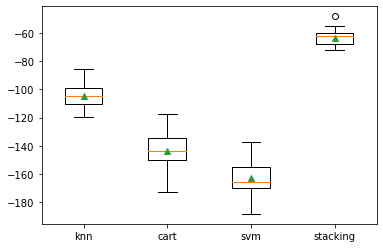

In [55]:
X, y = get_dataset()
models = get_models()

# avalia os modelos e regista os resultados
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# boxplot do desempenho dos modelos para comparação
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

# 12. Comparar os Modelos com as Decision Boundaries

In [92]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2000)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

ImportError: cannot import name 'DecisionBoundaryDisplay' from 'sklearn.inspection' (C:\Users\sonia.quaresma\Anaconda3\lib\site-packages\sklearn\inspection\__init__.py)